Feature ranking:
1. MLOGP (0.515586) (0.016023)
2. SM1_DZ (0.167472) (0.024376)
3. GATS1I (0.138872) (0.028557)
4. CIC0 (0.091189) (0.022979)
5. NDSCH (0.045120) (0.008298)
6. NDSSC (0.041761) (0.016297)

R2: 0.8952440089237287
EVS: 0.8955764566363836
MAE: 0.31397415355569536
MSE: 0.22173954152482647


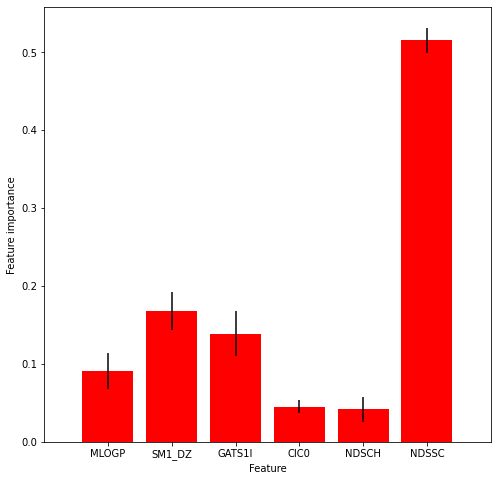

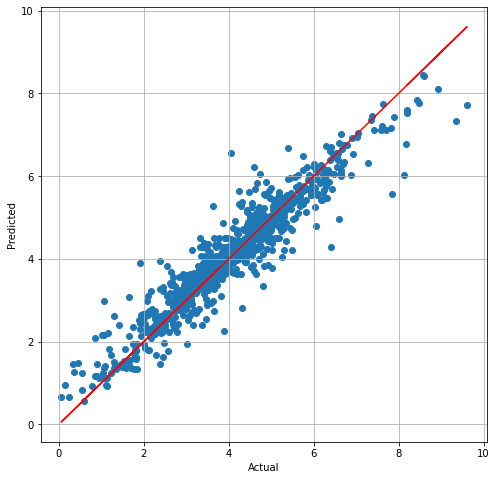

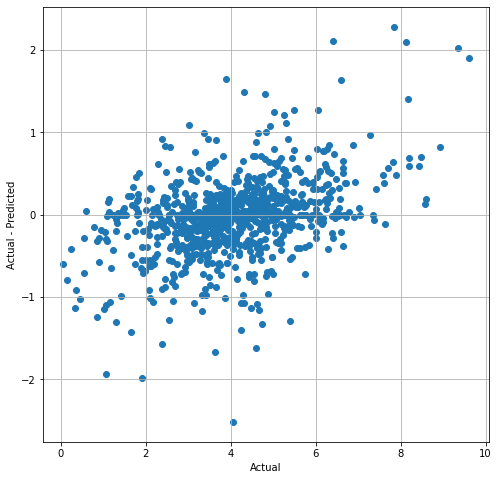

In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
import matplotlib.pyplot as plt

X = pd.read_csv('data/fish_toxicity.csv')
y = X.pop('QR').values

model = RandomForestRegressor(n_estimators=5, random_state=0)
model.fit(X, y)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f) (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]], std[indices[f]]))

predicted = model.predict(X)
print('\nR2:', r2_score(y, predicted))
print('EVS:', explained_variance_score(y, predicted))
print('MAE:', mean_absolute_error(y, predicted))
print('MSE:', mean_squared_error(y, predicted))

# Plot the feature importances of the forest
plt.figure(figsize=[8.0,8.0])
plt.ylabel('Feature importance')
plt.xlabel('Feature')
plt.bar(indices, importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()


plt.figure(figsize=[8.0,8.0])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(y, predicted)
plt.plot(y, y, color='r')
plt.grid(True)
plt.show()

plt.figure(figsize=[8.0,8.0])
plt.xlabel('Actual')
plt.ylabel('Actual - Predicted')
plt.scatter(y, y - predicted)
plt.grid(True)
plt.show()

